In [1]:
import drawSvg as draw
import random
import math
import numpy as np

In [2]:
seedOverride = None

seed = seedOverride if seedOverride is not None else random.randrange(0,10000)
random.seed(seed)


In [3]:

xMax = 5;
yMax = 100;
canvasWidth = 800;
canvasHeight = 800;


In [4]:

def fromCartesian(x,y):
    return (x * canvasWidth / xMax, y*canvasHeight / yMax)


class Line:
    def __init__(self, roots):
        self.roots = roots
        
    def fy(self,x):
        return math.prod([x-r for r in self.roots])

    def points(self):
        x0 = -1*xMax
        step = 0.01
        return [(x,self.fy(x)) for x in np.arange(x0,xMax, step)]

    def toSvg(self):
        canvasPoints = [fromCartesian(*point) for point in self.points()]
        print (len(canvasPoints))
        canvasPoints = [(x,y) for (x,y) in canvasPoints if -1 * canvasWidth / 2 < x < canvasWidth / 2 and -1 * canvasHeight / 2 < y < canvasHeight /2]
        print("filtered", len(canvasPoints))
        p = draw.Path(stroke_width=1, stroke='black',fill='none')
        p.M(*canvasPoints[0])
        for point in canvasPoints:
            p.L(*point)
        return p
        

In [5]:
lines = [Line([1,2,0.25,7,-3])]

In [6]:
d = draw.Drawing(canvasWidth, canvasHeight, origin='center')
for l in lines:
    d.append(l.toSvg())

1000
filtered 298


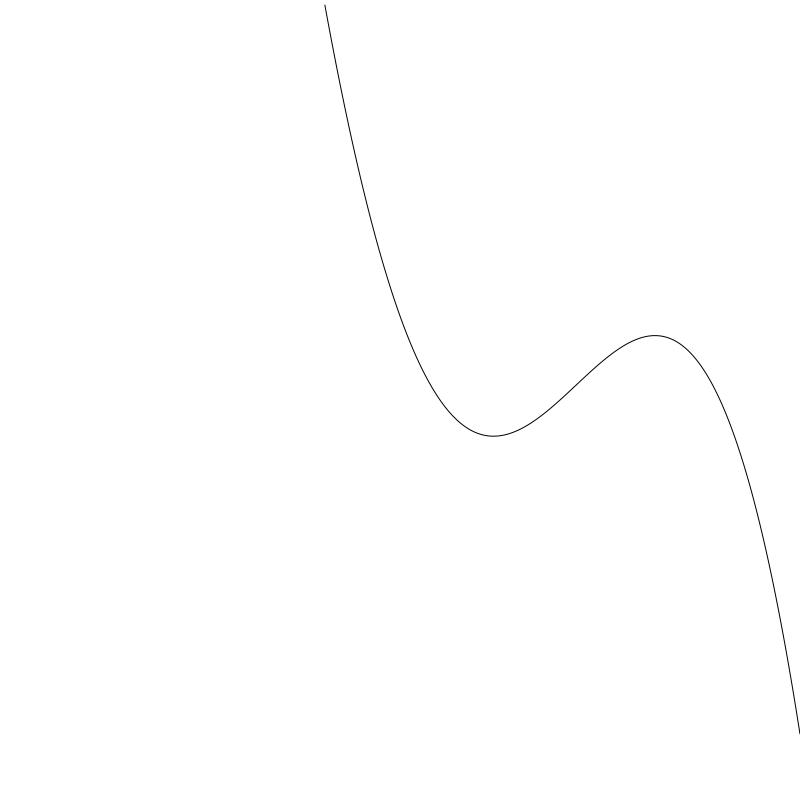

In [7]:
# Display in Jupyter notebook
d.rasterize()  # Display as PNG
d  # Display as SVG

In [8]:
# source : https://stackoverflow.com/a/21901260
import subprocess

def git_hash() -> str:
    return subprocess.check_output(['git', 'rev-parse', '--short', 'HEAD']).decode('ascii').strip()

In [9]:
name='-'.join(["simple-polynomail", "version", git_hash(), "seed", str(seed)])
d.saveSvg("svgs/" + name + ".svg")